In [1]:
import pandas as pd
import numpy as np
import seaborn as seb
import matplotlib.pyplot as plt
import statsmodels.api as stm

In [3]:
df = pd.read_csv("insurance.csv").round(2)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663572,1.094918,13270.422280
std,14.049960,6.097951,1.205493,12110.011259
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.297500,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.692500,2.000000,16639.915000
max,64.000000,53.130000,5.000000,63770.430000


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<Figure size 720x576 with 0 Axes>

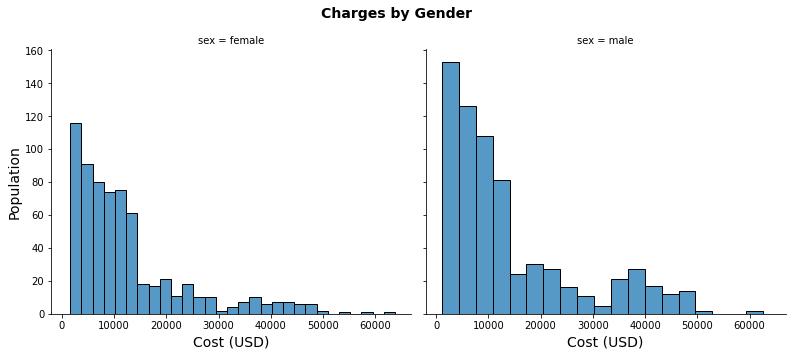

In [30]:
plt.figure(figsize= [10, 8])
grid = seb.FacetGrid(df, col="sex", height=5, aspect=1.1)
grid.map(seb.histplot, "charges")
grid.add_legend()
grid.fig.suptitle("Charges by Gender", fontsize=14, fontweight="bold")
grid.set_xlabels("Cost (USD)", fontsize=14)
grid.set_ylabels("Population", fontsize=14)
plt.tight_layout()

<Figure size 720x576 with 0 Axes>

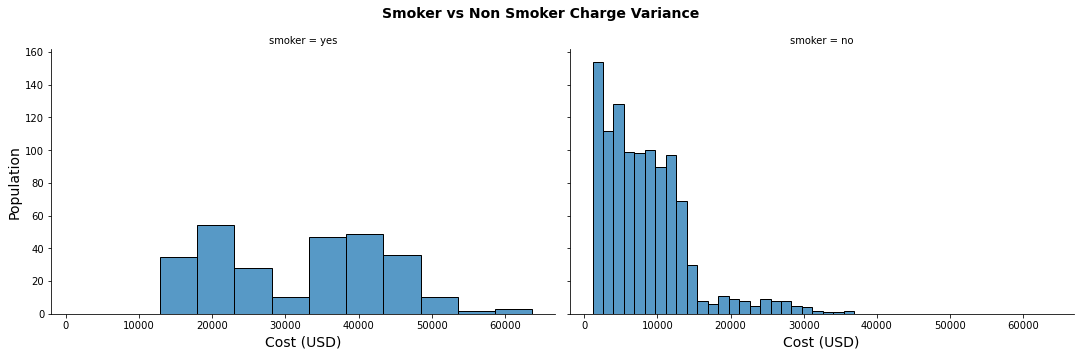

In [33]:
plt.figure(figsize= [10, 8])
grid = seb.FacetGrid(df, col="smoker", height=5, aspect=1.5)
grid.map(seb.histplot, "charges")
grid.add_legend()
grid.fig.suptitle("Smoker vs Non Smoker Charge Variance", fontsize=14, fontweight="bold")
grid.set_xlabels("Cost (USD)", fontsize=14)
grid.set_ylabels("Population", fontsize=14)
plt.tight_layout()

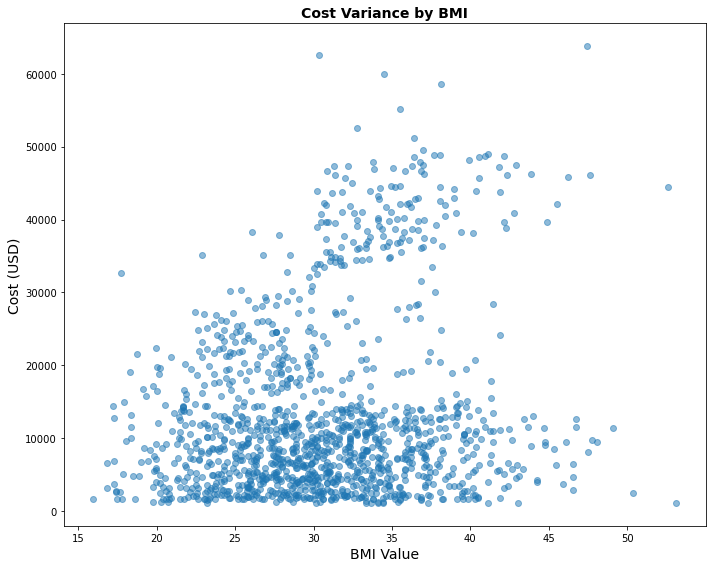

In [40]:
plt.figure(figsize=[10, 8])
plt.scatter(df.bmi, df.charges, alpha=0.5)
plt.title("Cost Variance by BMI", fontweight="bold", fontsize= 14)
plt.xlabel("BMI Value", fontsize= 14)
plt.ylabel("Cost (USD)", fontsize= 14)
plt.tight_layout()

In [53]:
lesT_10000 = df[df["charges"] <= 10000]
age_x = lesT_10000["age"].values
bmi_x = lesT_10000["bmi"].values
charge_y = lesT_10000["charges"].values

In [56]:
age_x_vector = age_x.reshape(-1,1)
bmi_x_vector = bmi_x.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(age_x_vector, charge_y, train_size=.8, test_size=.2)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (569, 1)
y_train shape (569,)
x_test shape (143, 1)
y_test shape (143,)


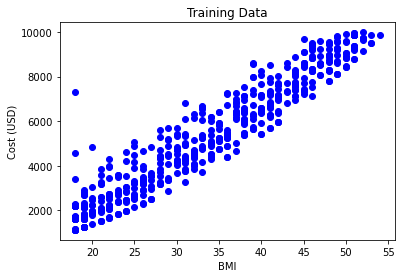

In [57]:
plt.scatter(x_train, y_train, color="blue")
plt.xlabel('Age')
plt.ylabel('Cost (USD)')
plt.title('Training Data')
plt.show()

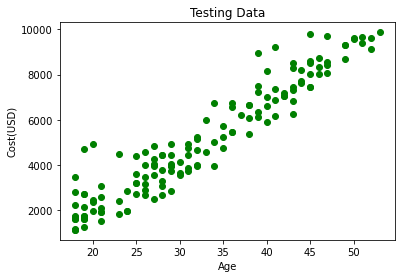

In [59]:
plt.scatter(x_test, y_test, color="green")
plt.xlabel("Age")
plt.ylabel("Cost(USD)")
plt.title("Testing Data")
plt.show()

In [60]:
lrg = LinearRegression()
lrg.fit(x_train, y_train)
charge_y_prediction = lrg.predict(x_test)
print(f"Train Score: {lrg.score(x_train,y_train)*100}%")
print(f"Test Score: {lrg.score(x_test, y_test)*100}%")

Train Score: 91.87886279815464%
Test Score: 90.31053373560368%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

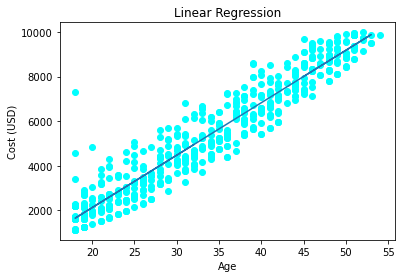

In [66]:
plt.scatter(x_train, y_train, color="cyan")
plt.plot(x_test, charge_y_prediction)
plt.xlabel("Age")
plt.ylabel("Cost (USD)")
plt.title("Linear Regression")
plt.plot

In [67]:
Test_age_1 = 20
Test_age_2 = 35
Test_age_3 = 55
Test_age_4 = 16
Test_age_5 = 65

In [71]:
print(f"AVG cost of medical care for a 20 year old: ${lrg.predict([[Test_age_1]])[0]}")
print(f"Avg cost of medical care for age 35: ${lrg.predict([[Test_age_2]])[0]}")
print(f"Avg cost of medical care for age 55: ${lrg.predict([[Test_age_3]])[0]}")
print(f"Avg cost of medical care for age 16: ${lrg.predict([[Test_age_4]])[0]}")
print(f"Avg cost of medical care for age 65: ${lrg.predict([[Test_age_5]])[0]}")

AVG cost of medical care for a 20 year old: $2123.336304107578
Avg cost of medical care for age 35: $5652.143948628495
Avg cost of medical care for age 55: $10357.220807989717
Avg cost of medical care for age 16: $1182.3209322353337
Avg cost of medical care for age 65: $12709.759237670329


#Feature creation: Bins for age groups


In [88]:
bins = [13, 21, 33, 45, 55, 65]
labels = [
    "teenager",
    "young adult",
    "adult",
    "middle age",
    "senior",
]

In [89]:
df["age_bin"] = pd.cut(df["age"], bins, labels=labels)
df.head(40)

,age,sex,bmi,children,smoker,region,charges,age_bin
0,19,female,27.90,0,yes,southwest,16884.92,teenager
1,18,male,33.77,1,no,southeast,1725.55,teenager
2,28,male,33.00,3,no,southeast,4449.46,young adult
3,33,male,22.70,0,no,northwest,21984.47,young adult
4,32,male,28.88,0,no,northwest,3866.86,young adult
5,31,female,25.74,0,no,southeast,3756.62,young adult
6,46,female,33.44,1,no,southeast,8240.59,middle age
7,37,female,27.74,3,no,northwest,7281.51,adult
8,37,male,29.83,2,no,northeast,6406.41,adult
9,60,female,25.84,0,no,northwest,28923.14,senior


In [90]:
df.age_bin.value_counts()

young adult    329
adult          315
middle age     284
senior         216
teenager       194
Name: age_bin, dtype: int64

#Charges by age bin

In [93]:
df[["age_bin", "charges"]].groupby("age_bin").median().sort_values(by="charges", ascending = False).round(2)

,charges
age_bin,
senior,13429.65
middle age,10477.96
adult,7337.75
young adult,4435.09
teenager,2202.28


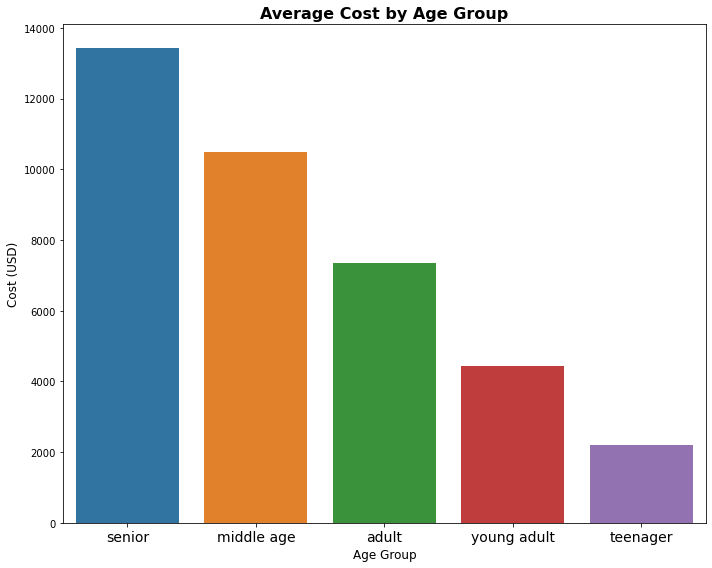

In [96]:
plt.figure(figsize=[10, 8])
seb.barplot(x="age_bin",y="charges",order=df[["age_bin", "charges"]].groupby("age_bin")
    .median().sort_values(by="charges", ascending=False).index.values,ci=None,estimator=np.median,
    data=df,
)
plt.title("Average Cost by Age Group", fontweight="bold", fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Cost (USD)", fontsize=12)
plt.tight_layout()

In [98]:
copy_of_df = df.copy()[["charges", "age","bmi","sex","region","smoker", "children"]]
copy_of_df["sex"] = df.sex.map({"male": 0, "female": 1})
copy_of_df["smoker"] = df.smoker.map({"yes": 1, "no": 0})
copy_of_df["region"] = df.region.map({"southwest": 0,"southeast": 1,"northwest": 2,"northeast": 3})
copy_of_df["bmi_region"] = copy_of_df.bmi * copy_of_df.region
copy_of_df["bmi_smoker"] = copy_of_df.bmi * copy_of_df.smoker
copy_of_df["bmi_children"] = copy_of_df.bmi * copy_of_df.children
copy_of_df["bmi_sex"] = copy_of_df.bmi * copy_of_df.sex
copy_of_df["age_children"] = copy_of_df.age * copy_of_df.children
copy_of_df["age_region"] = copy_of_df.age * copy_of_df.region
copy_of_df.head(20)


,charges,age,bmi,sex,region,smoker,children,bmi_region,bmi_smoker,bmi_children,bmi_sex,age_children,age_region
0,16884.92,19,27.90,1,0,1,0,0.00,27.90,0.00,27.90,0,0
1,1725.55,18,33.77,0,1,0,1,33.77,0.00,33.77,0.00,18,18
2,4449.46,28,33.00,0,1,0,3,33.00,0.00,99.00,0.00,84,28
3,21984.47,33,22.70,0,2,0,0,45.40,0.00,0.00,0.00,0,66
4,3866.86,32,28.88,0,2,0,0,57.76,0.00,0.00,0.00,0,64
5,3756.62,31,25.74,1,1,0,0,25.74,0.00,0.00,25.74,0,31
6,8240.59,46,33.44,1,1,0,1,33.44,0.00,33.44,33.44,46,46
7,7281.51,37,27.74,1,2,0,3,55.48,0.00,83.22,27.74,111,74
8,6406.41,37,29.83,0,3,0,2,89.49,0.00,59.66,0.00,74,111
9,28923.14,60,25.84,1,2,0,0,51.68,0.00,0.00,25.84,0,120


Text(0.5, 1.0, 'Feature Correlation Matrix')

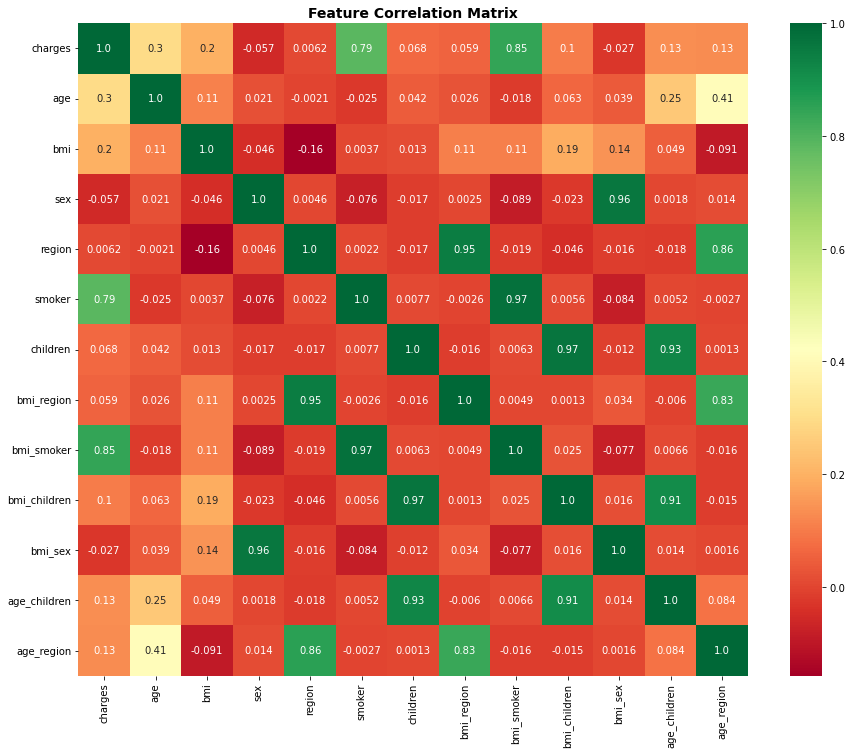

In [99]:
corr_matrix = copy_of_df.corr()
plt.figure(figsize=[15, 12])
seb.heatmap(corr_matrix, annot=True, fmt=".2", cmap="RdYlGn")
plt.title("Feature Correlation Matrix", fontweight="bold", fontsize=14)

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

import os
import random
import math


#Linear Regression model


In [113]:
y_pred = lrg.predict(x_test)

rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 =r2_score(y_test, y_pred)


In [114]:
print('\nRMSE: ', rmse)
print('MAPE: ', mape)
print('R2 Score: ', r2)

model_comparison = {}

model_comparison['LinearRegression'] = [rmse, mape, r2]


RMSE:  778.5278170834573
MAPE:  0.14905256046347493
R2 Score:  0.9031053373560368


#Decision Tree Regresor Model

In [115]:
D_tree = DecisionTreeRegressor().fit(x_train, y_train)

y_pred = D_tree.predict(x_test)

rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nRMSE: ', rmse)
print('MAPE: ', mape)
print('R2 Score: ', r2)

model_comparison['DecisionTreeRegressor'] = [rmse, mape, r2]


RMSE:  783.4599370483181
MAPE:  0.1558108999234296
R2 Score:  0.9018737567486967


#Random Forrest Regression Model

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
rfr = RandomForestRegressor()

parameters = {'n_estimators': [160, 180, 200, 220], 'max_depth': [16, 18, 20, 22, 24]}
gjr = GridSearchCV(rfr, parameters)
print("Testing...")
gjr.fit(x_train, y_train)
print(f'Best Hyperparameters: {gjr.best_params_}')

y_pred = gjr.predict(x_test)

rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nRMSE: ', rmse)
print('MAPE: ', mape)
print('R2 Score: ', r2)

model_comparison['RandomForestRegressor'] = [rmse, mape, r2]

Testing...
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 220}

RMSE:  783.5422469774584
MAPE:  0.15581498380113418
R2 Score:  0.9018531374725415


#Model Comparisson

In [123]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['MSE', 'MAPE', 'R2 Score']
model_comparison_df = model_comparison_df.sort_values('R2 Score', ascending=True)

model_comparison_df.style.background_gradient(cmap=seb.light_palette("#ea4335", as_cmap=True))

,MSE,MAPE,R2 Score
RandomForestRegressor,783.542247,0.155815,0.901853
DecisionTreeRegressor,783.459937,0.155811,0.901874
LinearRegression,778.527817,0.149053,0.903105
